# Web Traffic Time Series Forecasting

## Contents

* [Initialization](#initialization)
* [Examples of Common functions](#examples)
* [Data Data Collection and Preparation](#data_collection)
* [Article Category](#article_category)
* [Forecasting](#forecasting)
    * [Autoregression Model](#autoregression)
    * [ARIMA Model](#arima)
    * [Log Transformation](#log_transformation)
    * [Deep Learning](#deep-learning)
    * [Facebook Prophet](#prophet)
* [Notes](#notes)

<a id='initialization'></a>
### Initialization

In [2]:
# Always run this cell before using this notebook.

import pandas as pd
import numpy as np

# COMMON FUNCTIONS
# Examples are in the following cells.

# Get the dataframe
def get_df():
    df = pd.read_csv('data.csv', index_col = 'article')
    df.columns = pd.to_datetime(df.columns, format='%d-%m-%Y')
    return df

# Get the stacked dataframe
def get_stacked_df():
    df = pd.DataFrame(get_df().stack())
    idx = df.index
    idx.set_names(['article', 'date'], inplace=True)
    df.rename(columns = {0: 'visitors'}, inplace=True)
    return df

# Get the article list
def get_article_list():
    articles = get_df().index.tolist()
    return articles

<a id='examples'></a>
### Examples of Common Functions

In [201]:
# get_df() returns the original data as a dataframe, with article names as the index, and dates as the columns.
# Eg:

df = get_df()
df

,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,...,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30,2022-12-31
article,,,,,,,,,,,,,,,,,,,,,
"""Awaken,_My_Love!""",3012.0,3758.0,4342.0,3990.0,3598.0,3331.0,2937.0,3130.0,8679.0,4792.0,...,402.0,398.0,379.0,369.0,347.0,411.0,428.0,423.0,424.0,424.0
"""European_Society_for_Clinical_Investigation""",2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN
"""Weird_Al""_Yankovic",3063.0,2827.0,2724.0,2574.0,2690.0,2758.0,2685.0,2782.0,2603.0,2544.0,...,10430.0,8616.0,8339.0,8640.0,10771.0,16575.0,17142.0,13531.0,15698.0,18622.0
100_metres,972.0,976.0,876.0,981.0,1016.0,1005.0,896.0,1001.0,1470.0,1643.0,...,1600.0,1374.0,1560.0,2568.0,1584.0,1607.0,1489.0,1657.0,1605.0,1401.0
10_Cloverfield_Lane,11039.0,11640.0,9522.0,7969.0,10370.0,34369.0,31071.0,28466.0,25081.0,15753.0,...,1996.0,2881.0,2689.0,2514.0,3055.0,3093.0,3029.0,2783.0,2479.0,2162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zakir_Naik,1932.0,2357.0,2212.0,2168.0,1986.0,2143.0,2088.0,2221.0,2078.0,1955.0,...,2004.0,2212.0,3382.0,3354.0,2697.0,2263.0,2204.0,1998.0,2068.0,1892.0
Zayn_Malik,13306.0,13873.0,14602.0,16368.0,14539.0,14274.0,13901.0,14126.0,13098.0,14819.0,...,6856.0,6724.0,7343.0,7230.0,6968.0,7029.0,7192.0,7424.0,8012.0,7268.0
Zealandia_(continent),549.0,628.0,613.0,566.0,603.0,536.0,544.0,624.0,563.0,563.0,...,39.0,48.0,42.0,37.0,44.0,48.0,39.0,35.0,30.0,29.0


In [203]:
# get_stacked_df() returns the same data, but with article name and date as the index.
# Eg:

df = get_stacked_df()
df

visitors
article            date                
"Awaken,_My_Love!" 2017-01-01    3012.0
                   2017-01-02    3758.0
                   2017-01-03    4342.0
                   2017-01-04    3990.0
                   2017-01-05    3598.0
...                                 ...
Zoolander_No._2    2022-12-26       4.0
                   2022-12-28       2.0
                   2022-12-29       1.0
                   2022-12-30       1.0
                   2022-12-31       1.0

[5496613 rows x 1 columns]

In [205]:
# To get the data of a single article:

df = get_stacked_df()
articles = get_article_list()

df_1 = df.loc[articles[0]]
df_1

,visitors
date,
2017-01-01,3012.0
2017-01-02,3758.0
2017-01-03,4342.0
2017-01-04,3990.0
2017-01-05,3598.0
...,...
2022-12-27,411.0
2022-12-28,428.0
2022-12-29,423.0


In [210]:
# get_article_list() returns a list of article names.
# Eg:

articles = get_article_list()

print('Length:', len(articles), '\n')
for item in articles:
    print(item)

Length: 2534 

"Awaken,_My_Love!"
"European_Society_for_Clinical_Investigation"
"Weird_Al"_Yankovic
100_metres
10_Cloverfield_Lane
10_Gigabit_Ethernet
13_Hours:_The_Secret_Soldiers_of_Benghazi
1551
1896_Summer_Olympics
1918_flu_pandemic
1923_San_Pedro_Maritime_Strike
1936_Summer_Olympics
1976_Summer_Olympics
1980_Summer_Olympics
1984_Summer_Olympics
1989_(Taylor_Swift_album)
1999_(Prince_album)
2000_Summer_Olympics
2002_FIFA_World_Cup
2003_invasion_of_Iraq
2007_tuberculosis_scare
2008_Summer_Olympics
2008_Summer_Olympics_medal_table
2012_Benghazi_attack
2012_Summer_Olympics
2012_Summer_Olympics_medal_table
2014_FIFA_World_Cup
2015_NCAA_Men's_Division_I_Basketball_Tournament
2015_San_Bernardino_attack
2015_in_film
2016_Asia_Cup
2016_Berlin_attack
2016_Democratic_National_Convention
2016_European_Men's_Handball_Championship
2016_FIBA_World_Olympic_Qualifying_Tournaments_for_Men
2016_FIFA_Club_World_Cup
2016_FIFA_Futsal_World_Cup
2016_Fort_McMurray_wildfire
2016_Giro_d'Italia
2016_ICC_Wor

<a id='data_collection'></a>
### Data Collection and Preparation

In [114]:
import pandas as pd
import numpy as np
import json
import urllib.parse
import urllib.request
from datetime import datetime

In [112]:
# ⚠️DO NOT RUN!⚠️

# URI-encoding.
# Article names are stored in wikipedia-articles.csv.
# Article names should be URI-encoded, so that non-URI-safe characters like %, / or ? can be passed through the URI.

articles = pd.read_csv('wikipedia-articles.csv')
titles = []
titles_encoded = []
for item in articles.values:
    query = item[0].replace('_en.wikipedia.org_desktop_all-agents', '')
    titles.append(query)
    titles_encoded.append(urllib.parse.quote(query))
    
for item in titles:
    print(item)

In [3]:
# ⚠️DO NOT RUN!⚠️

# Fetching Data
# Daily visitor count of each article from 01-01-2017 to 31-12-2022 are fetched and stored in data.json

f = open("data.json", "a")

for title in titles:
    url = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/' + title + '/daily/2017010100/2022123100'    
    try:
        page = urllib.request.urlopen(url)
    except:
        f.write('')
    else:
        f.write(page.read().decode() + '\n')

f.close()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [116]:
# ⚠️DO NOT RUN!⚠️

# Converting data.json to DataFrame.
# First, a list of dates is created from 01-01-2017 to 31-12-2022.
# This list is to be used as the column names of the dataframe.

first_date = datetime.strptime("01-01-2017", "%d-%m-%Y")
last_date = datetime.strptime("31-12-2022", "%d-%m-%Y")
k = (last_date - first_date).days + 1

date_generated = pd.date_range(first_date, periods=k)
columns = date_generated.strftime("%d-%m-%Y").tolist()

# Next, an empty dataframe is created with article names as the index, and the dates as column names.

df = pd.DataFrame(index=titles, columns=columns)
df.index.name = 'article'

# data.json is opened, and its contents are stored in 'articles'

f = open('data.json', 'r')
articles = f.readlines()

# Each line of the JSON file contains the visitor count of an article on a single day.
# Eg:
#    {'project': 'en.wikipedia', 'article': '"Awaken,_My_Love!"', 'granularity': 'daily',
#     'timestamp': '2017010100', 'access': 'all-access', 'agent': 'all-agents', 'views': 3012}

# In the JSON file, the date (timestamp) is in YYYYMMDDHH format. We need to convert it into DD-MM-YYYY format.

for article in articles:
    d = json.loads(article)
    for item in d.values():
        for i in item:
            date = i['timestamp'][6:8] + '-' + i['timestamp'][4:6] + '-' + i['timestamp'][0:4]
            df.loc[i['article']][date] = i['views']
        
df

,01-01-2017,02-01-2017,03-01-2017,04-01-2017,05-01-2017,06-01-2017,07-01-2017,08-01-2017,09-01-2017,10-01-2017,...,22-12-2022,23-12-2022,24-12-2022,25-12-2022,26-12-2022,27-12-2022,28-12-2022,29-12-2022,30-12-2022,31-12-2022
article,,,,,,,,,,,,,,,,,,,,,
"""Awaken,_My_Love!""",3012,3758,4342,3990,3598,3331,2937,3130,8679,4792,...,402,398,379,369,347,411,428,423,424,424
"""European_Society_for_Clinical_Investigation""",2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,1,1,NaN,NaN,1,1,NaN
"""Weird_Al""_Yankovic",3063,2827,2724,2574,2690,2758,2685,2782,2603,2544,...,10430,8616,8339,8640,10771,16575,17142,13531,15698,18622
100_metres,972,976,876,981,1016,1005,896,1001,1470,1643,...,1600,1374,1560,2568,1584,1607,1489,1657,1605,1401
10_Cloverfield_Lane,11039,11640,9522,7969,10370,34369,31071,28466,25081,15753,...,1996,2881,2689,2514,3055,3093,3029,2783,2479,2162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zakir_Naik,1932,2357,2212,2168,1986,2143,2088,2221,2078,1955,...,2004,2212,3382,3354,2697,2263,2204,1998,2068,1892
Zayn_Malik,13306,13873,14602,16368,14539,14274,13901,14126,13098,14819,...,6856,6724,7343,7230,6968,7029,7192,7424,8012,7268
Zealandia_(continent),549,628,613,566,603,536,544,624,563,563,...,39,48,42,37,44,48,39,35,30,29


In [126]:
# Creating the CSV file

df.to_csv('data.csv')

In [147]:
pd.set_option('display.max_rows', None)

In [148]:
# Show the no. of NULL values in each row.

nulls = pd.DataFrame(df.isnull().sum(axis=1))
nulls[nulls[0] != 0]

,0
article,
"""European_Society_for_Clinical_Investigation""",1410
1923_San_Pedro_Maritime_Strike,378
2016_Berlin_attack,4
2016_FIBA_World_Olympic_Qualifying_Tournaments_for_Men,8
2016_North_Korean_nuclear_test,213
AC/DC,2191
Alexandre_Vattemare,56
Alice_Through_the_Looking_Glass_(film),25
Alternative_facts,21


In [134]:
# Reading CSV file.
df = pd.read_csv('data.csv', index_col = 'article')
df.columns = pd.to_datetime(df.columns, format='%d-%m-%Y')
df.head()

,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,...,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30,2022-12-31
article,,,,,,,,,,,,,,,,,,,,,
"""Awaken,_My_Love!""",3012.0,3758.0,4342.0,3990.0,3598.0,3331.0,2937.0,3130.0,8679.0,4792.0,...,402.0,398.0,379.0,369.0,347.0,411.0,428.0,423.0,424.0,424.0
"""European_Society_for_Clinical_Investigation""",2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN
"""Weird_Al""_Yankovic",3063.0,2827.0,2724.0,2574.0,2690.0,2758.0,2685.0,2782.0,2603.0,2544.0,...,10430.0,8616.0,8339.0,8640.0,10771.0,16575.0,17142.0,13531.0,15698.0,18622.0
100_metres,972.0,976.0,876.0,981.0,1016.0,1005.0,896.0,1001.0,1470.0,1643.0,...,1600.0,1374.0,1560.0,2568.0,1584.0,1607.0,1489.0,1657.0,1605.0,1401.0
10_Cloverfield_Lane,11039.0,11640.0,9522.0,7969.0,10370.0,34369.0,31071.0,28466.0,25081.0,15753.0,...,1996.0,2881.0,2689.0,2514.0,3055.0,3093.0,3029.0,2783.0,2479.0,2162.0


In [135]:
articles = df.index.tolist()
articles

['"Awaken,_My_Love!"',
 '"European_Society_for_Clinical_Investigation"',
 '"Weird_Al"_Yankovic',
 '100_metres',
 '10_Cloverfield_Lane',
 '10_Gigabit_Ethernet',
 '13_Hours:_The_Secret_Soldiers_of_Benghazi',
 '1551',
 '1896_Summer_Olympics',
 '1918_flu_pandemic',
 '1923_San_Pedro_Maritime_Strike',
 '1936_Summer_Olympics',
 '1976_Summer_Olympics',
 '1980_Summer_Olympics',
 '1984_Summer_Olympics',
 '1989_(Taylor_Swift_album)',
 '1999_(Prince_album)',
 '2000_Summer_Olympics',
 '2002_FIFA_World_Cup',
 '2003_invasion_of_Iraq',
 '2007_tuberculosis_scare',
 '2008_Summer_Olympics',
 '2008_Summer_Olympics_medal_table',
 '2012_Benghazi_attack',
 '2012_Summer_Olympics',
 '2012_Summer_Olympics_medal_table',
 '2014_FIFA_World_Cup',
 "2015_NCAA_Men's_Division_I_Basketball_Tournament",
 '2015_San_Bernardino_attack',
 '2015_in_film',
 '2016_Asia_Cup',
 '2016_Berlin_attack',
 '2016_Democratic_National_Convention',
 "2016_European_Men's_Handball_Championship",
 '2016_FIBA_World_Olympic_Qualifying_Tourname

In [136]:
# DataFrame is stacked

df = pd.DataFrame(df.stack())
idx = df.index
idx.set_names(['article', 'date'], inplace=True)
df.rename(columns = {0: 'visitors'}, inplace=True)
df

visitors
article            date                
"Awaken,_My_Love!" 2017-01-01    3012.0
                   2017-01-02    3758.0
                   2017-01-03    4342.0
                   2017-01-04    3990.0
                   2017-01-05    3598.0
...                                 ...
Zoolander_No._2    2022-12-26       4.0
                   2022-12-28       2.0
                   2022-12-29       1.0
                   2022-12-30       1.0
                   2022-12-31       1.0

[5496613 rows x 1 columns]

<a id='article_category'></a>
### Article Category

In [102]:
article_name = titles[0]
print(article_name)
url = "https://en.wikipedia.org/w/api.php?action=query&prop=revisions&titles=" + article_name + "&rvslots=*&rvprop=content&formatversion=2&format=json"

f = open("content.json", "w", encoding="utf-8")

try:
    page = urllib.request.urlopen(url)
except:
    f.write('')
else:
    f.write(page.read().decode() + '\n')

f.close()

"Awaken,_My_Love!"


In [103]:
f = open('content.json', 'r', encoding="utf-8")
lines = f.readlines()
for line in lines:
    d = json.loads(line)
    print(d)

{'batchcomplete': True, 'query': {'normalized': [{'fromencoded': False, 'from': '"Awaken,_My_Love!"', 'to': '"Awaken, My Love!"'}], 'pages': [{'pageid': 52243591, 'ns': 0, 'title': '"Awaken, My Love!"', 'revisions': [{'slots': {'main': {'contentmodel': 'wikitext', 'contentformat': 'text/x-wiki', 'content': '{{Use mdy dates|date=September 2018}}\n{{Infobox album\n| name       = "Awaken, My Love!"\n| type       = studio\n| artist     = [[Donald Glover|Childish Gambino]]\n| cover      = Childish Gambino - Awaken, My Love!.png\n| alt        =\n| released   = {{Start date|2016|12|02}}\n| recorded   =\n| studio     = {{flatlist|\n* [[Conway Recording Studios|Conway]] (Hollywood)\n* ELBO ([[Glendale, California|Glendale]])\n}}\n| genre      = \n* [[Contemporary R&B|R&B]]<ref name="allmusic"/>\n* [[soul music|soul]]<ref name="exclaim">{{cite journal|url=http://exclaim.ca/music/article/childish_gambino-awaken_my_love|title=Awaken, My Love!|journal=[[Exclaim!]]|date=December 5, 2016|access-date=

In [104]:
content = d['query']['pages'][0]['revisions'][0]['slots']['main']['content']
for i in content.splitlines():
    if i.startswith('[[Category:'):
        print(i[11:-2])

2016 albums
Donald Glover albums
Glassnote Records albums
Albums produced by Ludwig Göransson


<a id='forecasting'></a>
### Forecasting

<a id='autoregression'></a>
### AutoRegression Model

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [147]:
df = get_stacked_df()
df_1 = df.loc[articles[0]]
X = df_1.values
X

array([[3012.],
       [3758.],
       [4342.],
       ...,
       [ 423.],
       [ 424.],
       [ 424.]])

<AxesSubplot: xlabel='date'>

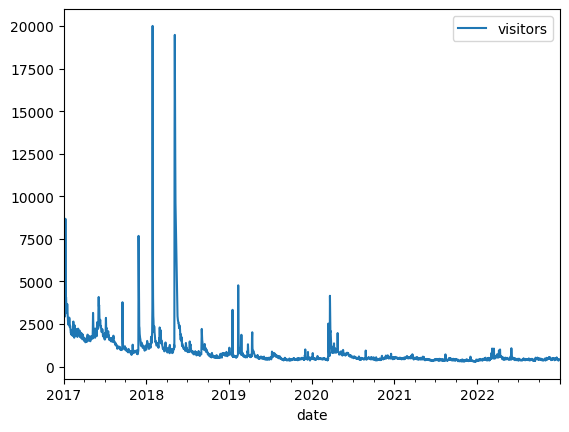

In [139]:
df_1.plot()

In [167]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df_1['visitors'], autolag = 'AIC')

print('ADF: ', dftest[0])
print('P-value: ', dftest[1])
print('No. of Lags: ', dftest[2])
print('No. of observations used for ADF Regression and Critical Values Calculation: ', dftest[3])
print('Critical Values: ')
for key, val in dftest[4].items():
    print('\t', key, ':', val)

ADF:  -15.355263096057781
P-value:  3.6740252160491595e-28
No. of Lags:  3
No. of observations used for ADF Regression and Critical Values Calculation:  2187
Critical Values: 
	 1% : -3.4333435948613777
	 5% : -2.8628624711279094
	 10% : -2.5674740166474006


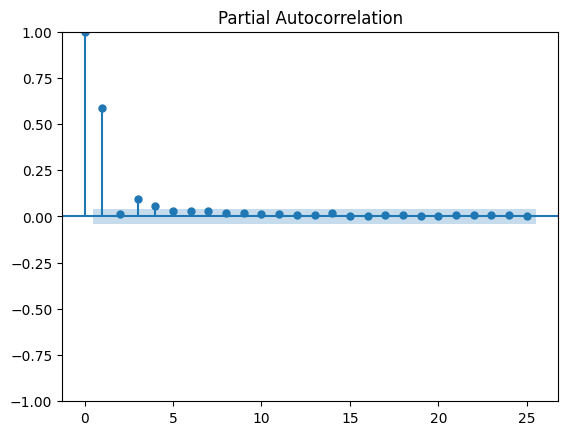

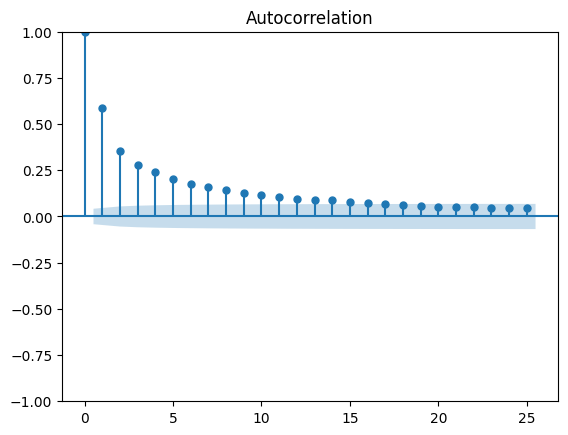

In [168]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

pacf = plot_pacf(df_1['visitors'], lags=25)
acf = plot_acf(df_1['visitors'], lags=25)

In [169]:
train = X[:len(X) - 7]
test = X[len(X) - 7:]

In [170]:
model = AutoReg(train, lags=2).fit()

In [171]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 2184
Model:                     AutoReg(2)   Log Likelihood              -23816.427
Method:               Conditional MLE   S.D. of innovations          13306.582
Date:                Thu, 02 Mar 2023   AIC                          47640.853
Time:                        14:58:26   BIC                          47663.605
Sample:                             2   HQIC                         47649.170
                                 2184                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1849.7205    298.357      6.200      0.000    1264.951    2434.490
y.L1           0.5794      0.021     27.067      0.000       0.537       0.621
y.L2           0.0142      0.021      0.663      0.5

In [172]:
print(len(train))

2184


In [173]:
pred = model.predict(start = len(train), end = len(X) - 1, dynamic = False)

[4029.13498477 4236.18596767 4361.28692428 4436.7066462  4482.17891413
 4509.59508792 4526.12487009]


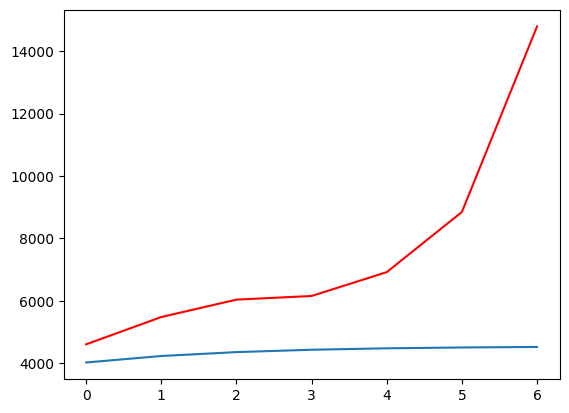

In [174]:
plt.plot(pred)
plt.plot(test, color='red')
print(pred)

In [175]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test, pred))
print(rmse)

4435.324085330221


<a id='arima'></a>
### ARIMA Model

In [88]:
import pandas as pd
import numpy as np

<AxesSubplot: xlabel='date'>

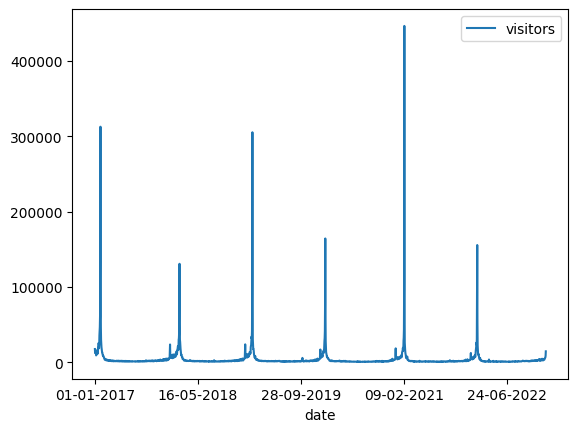

In [155]:
df.loc[articles[437]].plot()

In [177]:
df_1 = df.loc[articles[437]]
df_1

,visitors
date,
01-01-2017,17856.0
02-01-2017,12468.0
03-01-2017,16045.0
04-01-2017,15152.0
05-01-2017,14302.0
...,...
27-12-2022,6041.0
28-12-2022,6158.0
29-12-2022,6921.0


In [209]:
df_1 = df.loc[articles[0]]
df_1.index = pd.to_datetime(df_1.index, format='%d-%m-%Y')
df_1

,visitors
date,
2017-01-01,3012.0
2017-01-02,3758.0
2017-01-03,4342.0
2017-01-04,3990.0
2017-01-05,3598.0
...,...
2022-12-27,411.0
2022-12-28,428.0
2022-12-29,423.0


<AxesSubplot: xlabel='date'>

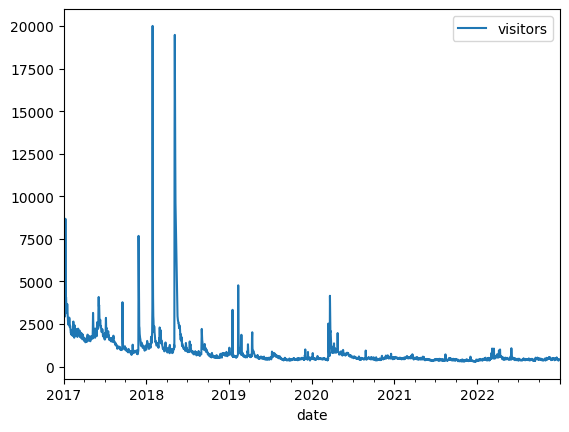

In [210]:
df_1.plot()

In [211]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print('ADF: ', dftest[0])
    print('P-value: ', dftest[1])
    print('No. of Lags: ', dftest[2])
    print('No. of observations used for ADF Regression and Critical Values Calculation: ', dftest[3])
    print('Critical Values: ')
    for key, val in dftest[4].items():
        print('\t', key, ':', val)

In [212]:
ad_test(df_1['visitors'])

ADF:  -8.930420503510105
P-value:  9.849551038565415e-15
No. of Lags:  5
No. of observations used for ADF Regression and Critical Values Calculation:  2185
Critical Values: 
	 1% : -3.4333463382232248
	 5% : -2.86286368244583
	 10% : -2.5674746615942903


In [213]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [214]:
stepwise_fit = auto_arima(df_1['visitors'], trace = True, suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=34272.403, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=34533.923, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=34490.412, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=34464.153, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=34531.930, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=34269.657, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=34365.873, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=34268.712, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=34269.866, Time=0.83 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=34426.345, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=34268.388, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=34462.159, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=34488.421, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=34269.706, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0

In [215]:
from statsmodels.tsa.arima.model import ARIMA

In [216]:
print(df_1.shape)
train = df_1.iloc[:-30]
test = df_1.iloc[-30:]
print(train.shape, test.shape)

(2191, 1)
(2161, 1) (30, 1)


In [217]:
model = ARIMA(train['visitors'], order = (1,1, 1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               visitors   No. Observations:                 2161
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16911.360
Date:                Thu, 02 Mar 2023   AIC                          33828.719
Time:                        15:32:51   BIC                          33845.753
Sample:                    01-01-2017   HQIC                         33834.949
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7420      0.006    131.867      0.000       0.731       0.753
ma.L1         -0.9841      0.006   -168.789      0.000      -0.996      -0.973
sigma2      3.696e+05    942.250    392.220      0.000    3.68e+05    3.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):          16448481.24
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            15.87
Prob(H) (two-sided):                  0.00   Kurtosis:                       429.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [218]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start = start, end = end, typ = 'levels')
pred_df = pd.DataFrame(pred)
pred_df

,predicted_mean
2022-12-02,431.739289
2022-12-03,432.287812
2022-12-04,432.694794
2022-12-05,432.996758
2022-12-06,433.220804
2022-12-07,433.387036
2022-12-08,433.510374
2022-12-09,433.601886
2022-12-10,433.669784
2022-12-11,433.720162


<AxesSubplot: xlabel='date'>

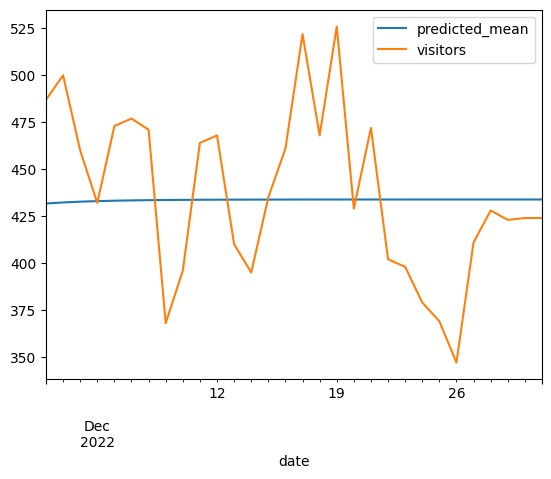

In [219]:
pred.plot(legend = True)
test['visitors'].plot(legend = True)

<a id='log_transformation'></a>
### Log Transformation

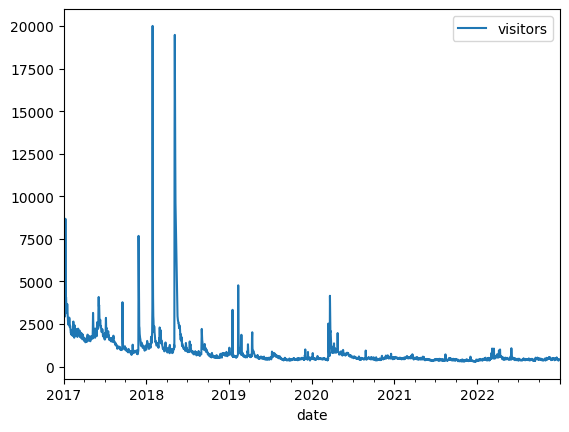

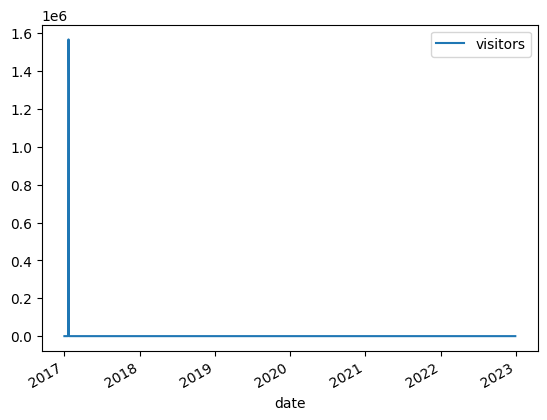

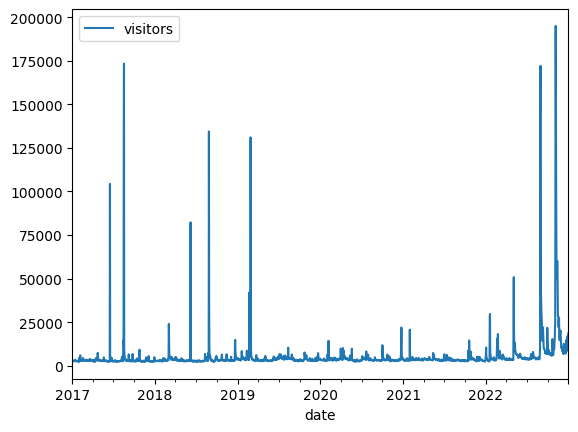

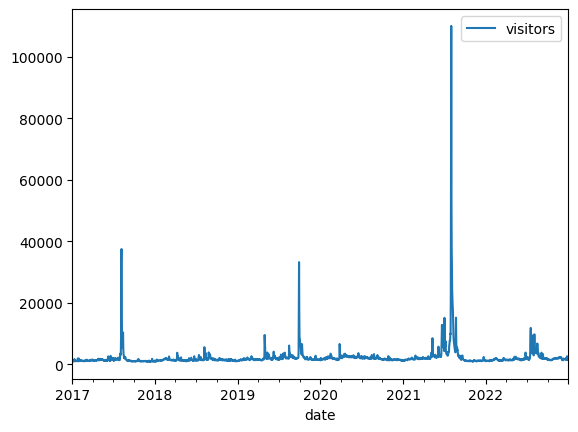

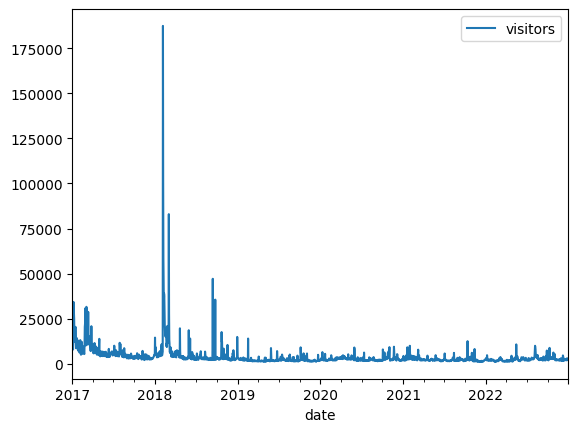

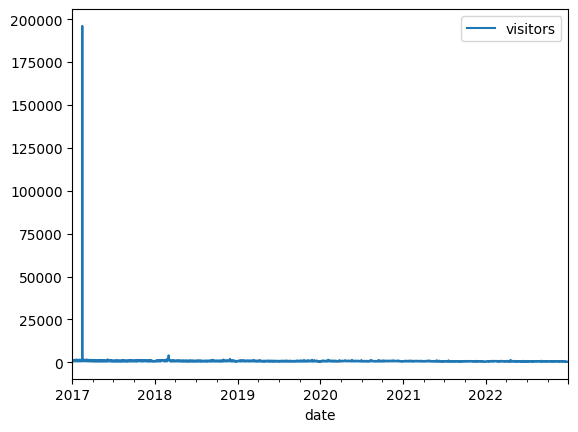

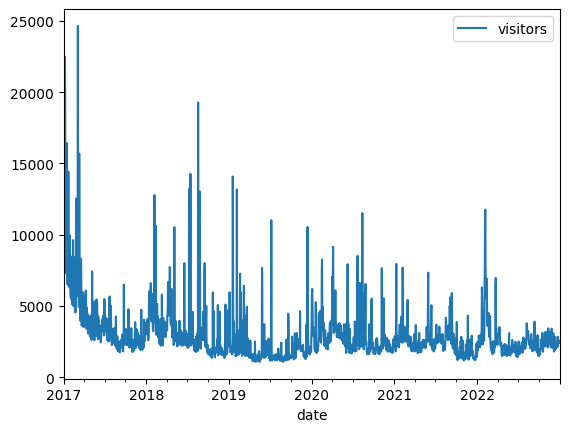

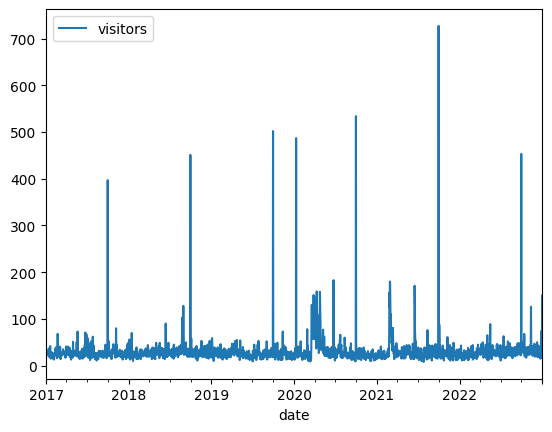

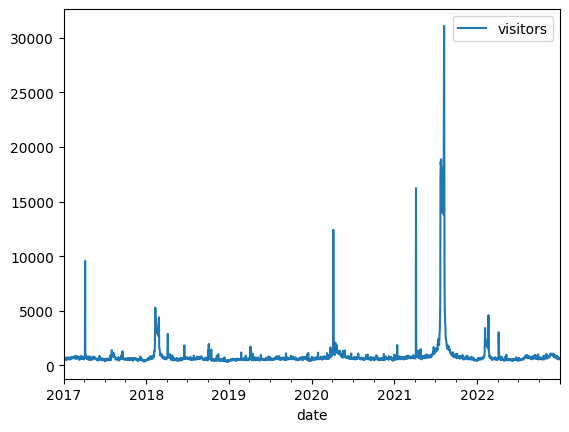

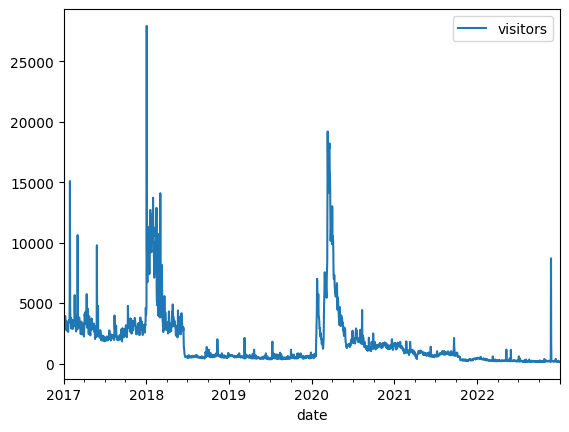

In [172]:
df = get_stacked_df()
for i in range(10):
    df_1 = get_stacked_df().loc[articles[i]]
    df_1.plot(x = df_1)

In [170]:
dftest = adfuller(df_1['visitors'])

print('ADF: ', dftest[0])
print('P-value: ', dftest[1])
print('No. of Lags: ', dftest[2])
print('No. of observations used for ADF Regression and Critical Values Calculation: ', dftest[3])
print('Critical Values: ')
for key, val in dftest[4].items():
    print('\t', key, ':', val)

ADF:  -8.930420503510105
P-value:  9.849551038565415e-15
No. of Lags:  5
No. of observations used for ADF Regression and Critical Values Calculation:  2185
Critical Values: 
	 1% : -3.4333463382232248
	 5% : -2.86286368244583
	 10% : -2.5674746615942903


<a id='notes'></a>
### Notes

* ipywidgets

In [3]:
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets
# defining some widgets
text = widgets.Text(
       value='My Text',
       description='Title', )
calendar = widgets.DatePicker(
           description='Select Date')
slider = widgets.FloatSlider(
         value=1,
         min=0,
         max=10.0,
         step=0.1,)
menu = widgets.Dropdown(
       options=['red', 'blue', 'green'],
       value='red',
       description='Color:')
checkbox = widgets.Checkbox(
           description='Check to invert',)

<a id='deep-learning'></a>
### Deep Learning
[Link](https://www.analyticsvidhya.com/blog/2021/09/web-traffic-forecasting-using-deep-learning/)

In [68]:
import pandas as pd
import numpy as np
data=pd.read_csv('webtraffic.csv')

In [87]:
data.shape

(4896, 2)

In [71]:
data.head()

,Hour Index,Sessions
0,0,1418159421
1,1,1113769116
2,2,919158921
3,3,822352824
4,4,735526737


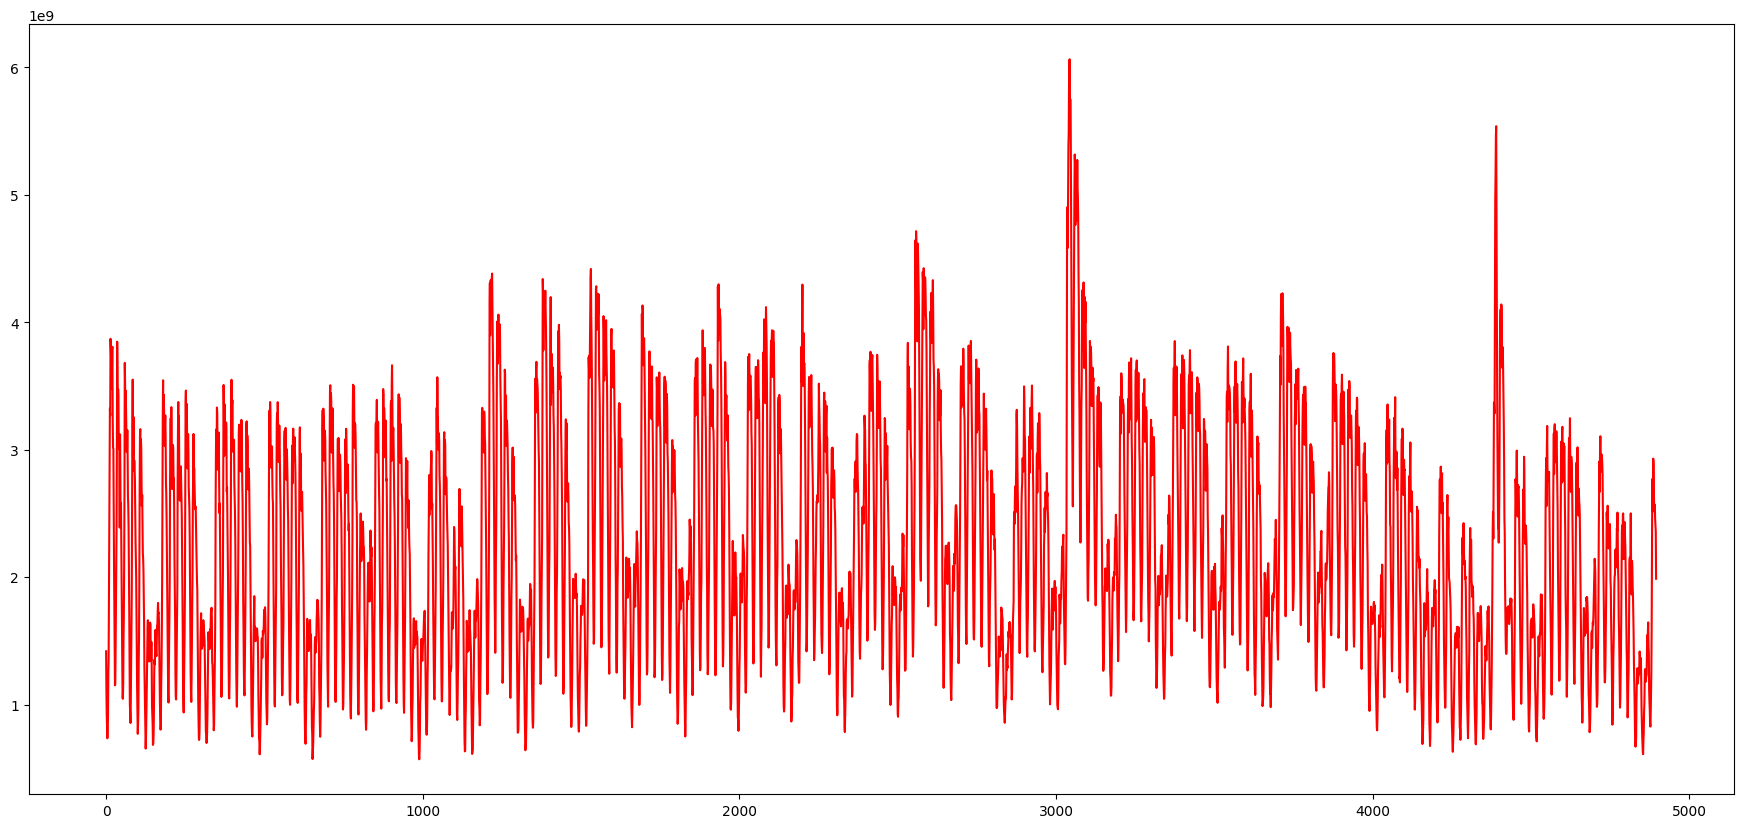

In [72]:
import matplotlib.pyplot as plt
sessions = data['Sessions'].values
ar = np.arange(len(sessions))
plt.figure(figsize=(22,10))
plt.plot(ar, sessions,'r')
plt.show()

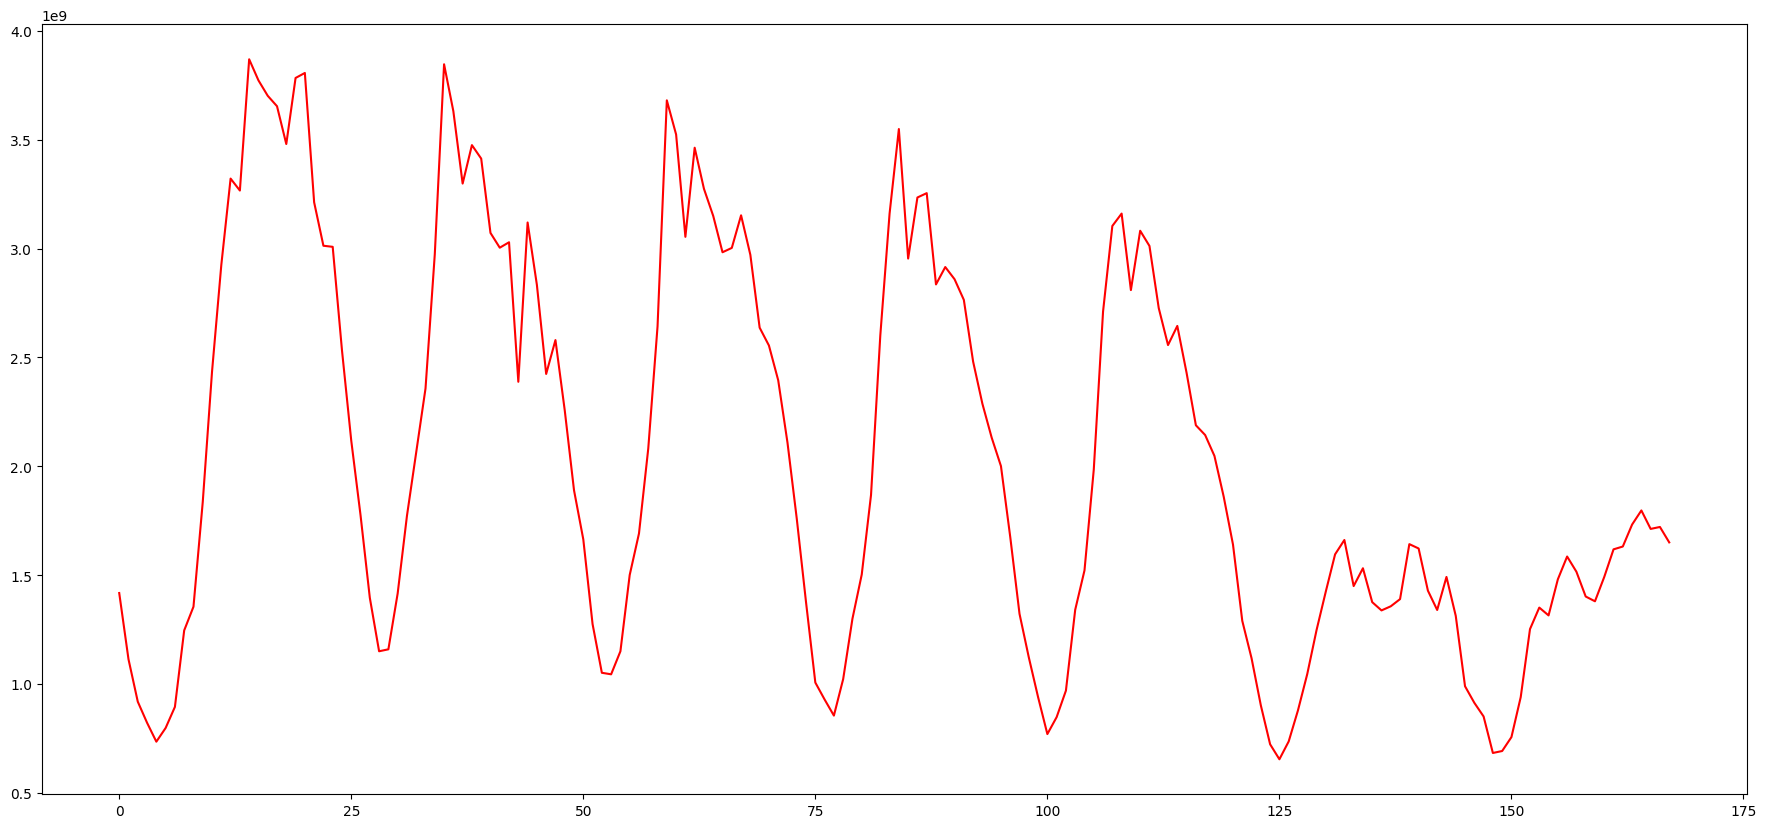

In [73]:
#first week web traffic
sample = sessions[:168]
ar = np.arange(len(sample))
plt.figure(figsize=(22,10))
plt.plot(ar, sample,'r')
plt.show()

In [88]:
def prepare_data(seq,num):
    x=[]
    y=[]
    for i in range(0,(len(seq)-num),1):   
        input_ = seq[i:i+num]
        output  = seq[i+num]

        x.append(input_)
        y.append(output)
    
    return np.array(x), np.array(y)

In [89]:
num=168
x,y= prepare_data(sessions,num)
print(len(x))

4728


In [92]:
ind = int(0.9 * len(x))
x_tr = x[:ind]
y_tr = y[:ind]
x_val=x[ind:]
y_val=y[ind:]

In [93]:
from sklearn.preprocessing import StandardScaler
#normalize the inputs
x_scaler= StandardScaler()
x_tr = x_scaler.fit_transform(x_tr)
x_val= x_scaler.transform(x_val)
#reshaping the output for normalization
y_tr=y_tr.reshape(len(y_tr),1)
y_val=y_val.reshape(len(y_val),1)
#normalize the output
y_scaler=StandardScaler()
y_tr = y_scaler.fit_transform(y_tr)[:,0]
y_val = y_scaler.transform(y_val)[:,0]

#reshaping input data
x_tr= x_tr.reshape(x_tr.shape[0],x_tr.shape[1],1)
x_val= x_val.reshape(x_val.shape[0],x_val.shape[1],1)
print(x_tr.shape)

(4255, 168, 1)


In [94]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from tensorflow import keras
# define model
model =  Sequential()
model.add(LSTM(128,input_shape=(168,1)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

In [95]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Define the optimizer and loss
model.compile(loss='mse',optimizer='adam')

#Define the callback to save the best model during the training
mc = ModelCheckpoint('best_model.hdf5', monitor='val_loss',
                     verbose=1, save_best_only=True, mode='min')

# Train the model for 30 epochs with batch size of 32:
history = model.fit(x_tr, y_tr ,epochs=30, batch_size=32, 
                    validation_data=(x_val,y_val), callbacks=[mc])

Epoch 1/30
133/133 [==============================] - ETA: 0s - loss: 0.1793
Epoch 1: val_loss improved from inf to 0.04093, saving model to best_model.hdf5
133/133 [==============================] - 15s 88ms/step - loss: 0.1793 - val_loss: 0.0409
Epoch 2/30
133/133 [==============================] - ETA: 0s - loss: 0.0460
Epoch 2: val_loss improved from 0.04093 to 0.03175, saving model to best_model.hdf5
133/133 [==============================] - 9s 67ms/step - loss: 0.0460 - val_loss: 0.0317
Epoch 3/30
133/133 [==============================] - ETA: 0s - loss: 0.0376
Epoch 3: val_loss improved from 0.03175 to 0.02854, saving model to best_model.hdf5
133/133 [==============================] - 9s 67ms/step - loss: 0.0376 - val_loss: 0.0285
Epoch 4/30
133/133 [==============================] - ETA: 0s - loss: 0.0341
Epoch 4: val_loss improved from 0.02854 to 0.02435, saving model to best_model.hdf5
133/133 [==============================] - 9s 68ms/step - loss: 0.0341 - val_loss: 0.0243

In [97]:
model.load_weights('best_model.hdf5')

In [98]:
mse = model.evaluate(x_val,y_val)
print("Mean Square Error:",mse)

15/15 [==============================] - 0s 24ms/step - loss: 0.0153
Mean Square Error: 0.015316037461161613


In [99]:
# build a simple moving average model
def compute_moving_average(data):
    pred=[]
    for i in data:
        avg=np.sum(i)/len(i)
        pred.append(avg)
    return np.array(pred)
# reshape the data
x_reshaped = x_val.reshape(-1,168)
# get predictions
y_pred = compute_moving_average(x_reshaped)

In [100]:
# evaluate the performance of model on the validation data
mse = np.sum ( (y_val - y_pred) **2 ) / (len(y_val))
print("Mean square of error:- ",mse)

Mean square of error:-  0.5546025834434455


In [103]:
def forecast(x_val, no_of_pred, ind):
    predictions=[]
    #intialize the array with a weeks data
    temp=x_val[ind]
    for i in range(no_of_pred):
        #predict for the next hour
        pred=model.predict(temp.reshape(1,-1,1))[0][0]
    
        #append the prediction as the last element of array
        temp = np.insert(temp,len(temp),pred)
        predictions.append(pred)
        #ignore the first element of array
        temp = temp[1:]
    return predictions

In [107]:
no_of_pred =24
ind=72
y_pred= forecast(x_val,no_of_pred,ind)
y_true = y_val[ind:ind+(no_of_pred)]
# Lets convert back the normalized values to the original dimensional space
y_true= y_scaler.inverse_transform(y_true)
y_pred= y_scaler.inverse_transform(y_pred).reshape(-1,1)

def plot(y_true,y_pred):
    ar = np.arange(len(y_true))
    plt.figure(figsize=(22,10))
    plt.plot(ar, y_true,'r')
    plt.plot(ar, y_pred,'y')
    plt.show()
plot(y_true,y_pred)

1/1 [==============================] - 0s 30ms/step


ValueError: Expected 2D array, got 1D array instead:
array=[-1.49374192 -1.41747393 -1.1723268  -0.85200121 -0.76156916 -0.71036065
 -0.75176328 -0.68639071 -0.73977831 -0.84873259 -0.79861362 -0.81277767
 -0.56436192 -0.60685409 -0.61883906 -0.69728614 -0.73977831 -0.90538881
 -1.26711702 -1.3531909  -1.51662232 -1.69966551 -1.69748643 -1.73779951].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<a id='prophet'></a>
### Facebook Prophet

In [113]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [158]:
articles = get_article_list()
data = get_stacked_df().loc[articles[0]]
data.reset_index(inplace=True)
data.rename(columns = {'date':'ds', 'visitors':'y'}, inplace = True)
data.head()

,ds,y
0,2017-01-01,3012.0
1,2017-01-02,3758.0
2,2017-01-03,4342.0
3,2017-01-04,3990.0
4,2017-01-05,3598.0


In [146]:
train = data[:-30]
test = data[-30:]

print(train.shape)
print(test.shape)

(2161, 2)
(30, 2)


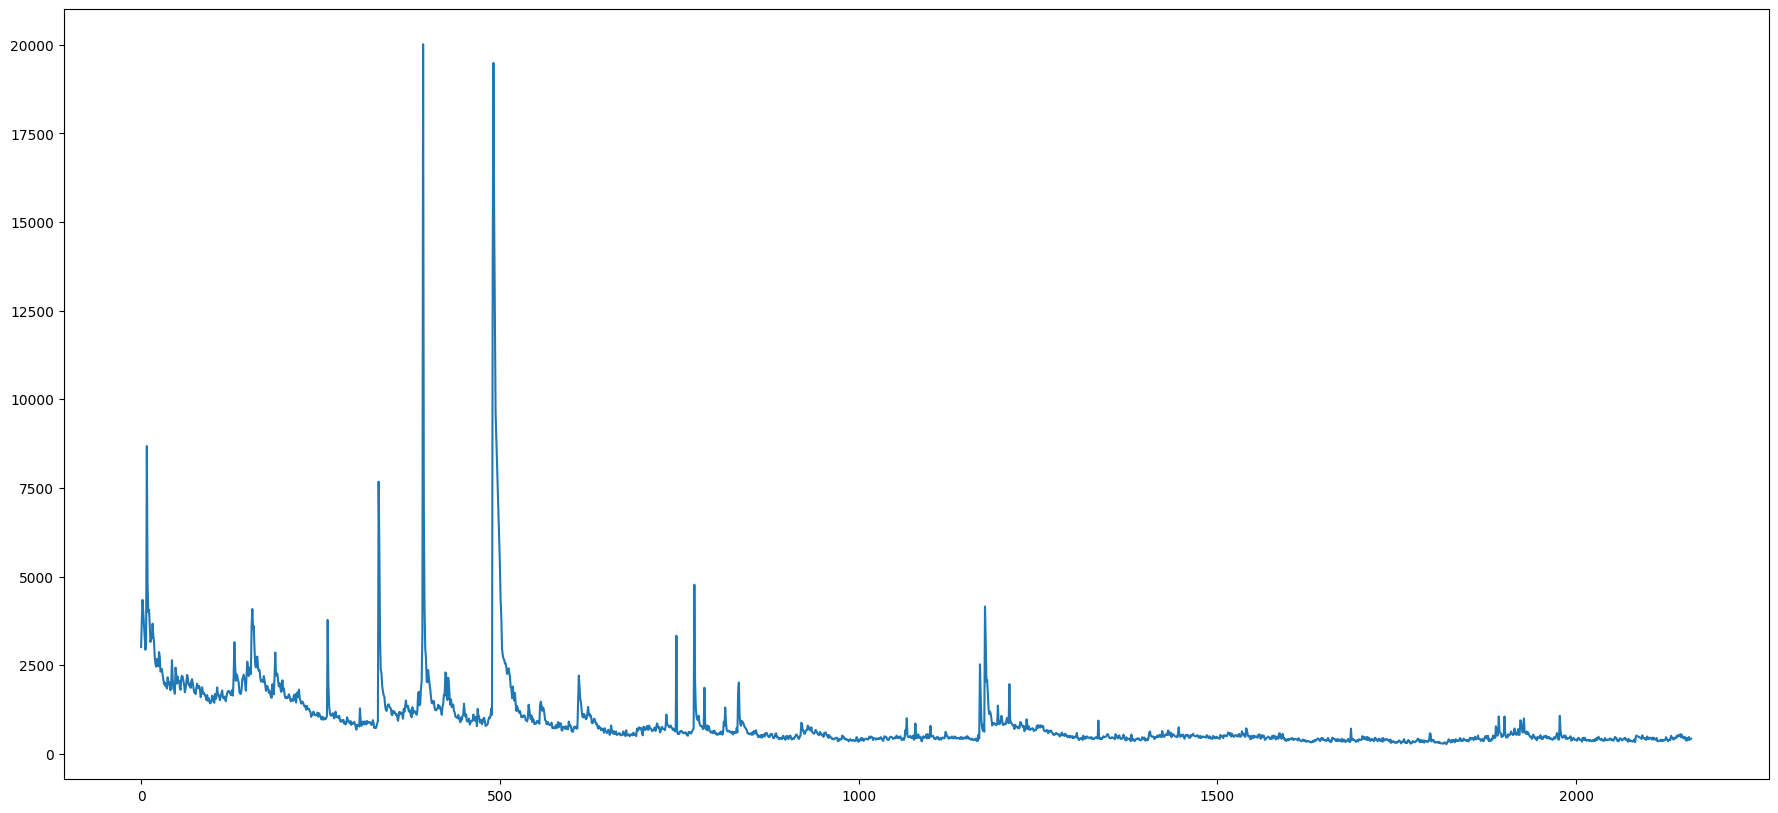

In [147]:
visitors = train['y'].values
ar = np.arange(len(visitors))
plt.figure(figsize=(22,10))
plt.plot(ar, visitors)
plt.show()

In [161]:
s = Prophet()
s.fit(train)

11:15:51 - cmdstanpy - INFO - Chain [1] start processing
11:15:51 - cmdstanpy - INFO - Chain [1] done processing


In [162]:
future = s.make_future_dataframe(periods=30)
future.tail()

,ds
2186,2022-12-27
2187,2022-12-28
2188,2022-12-29
2189,2022-12-30
2190,2022-12-31


In [163]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2186,2022-12-27,400.191535,-683.556690,1544.686279
2187,2022-12-28,363.599709,-769.657969,1565.128322
2188,2022-12-29,353.895052,-782.513213,1478.877599
2189,2022-12-30,327.079982,-792.299255,1426.899430
2190,2022-12-31,307.063550,-813.215169,1452.073242


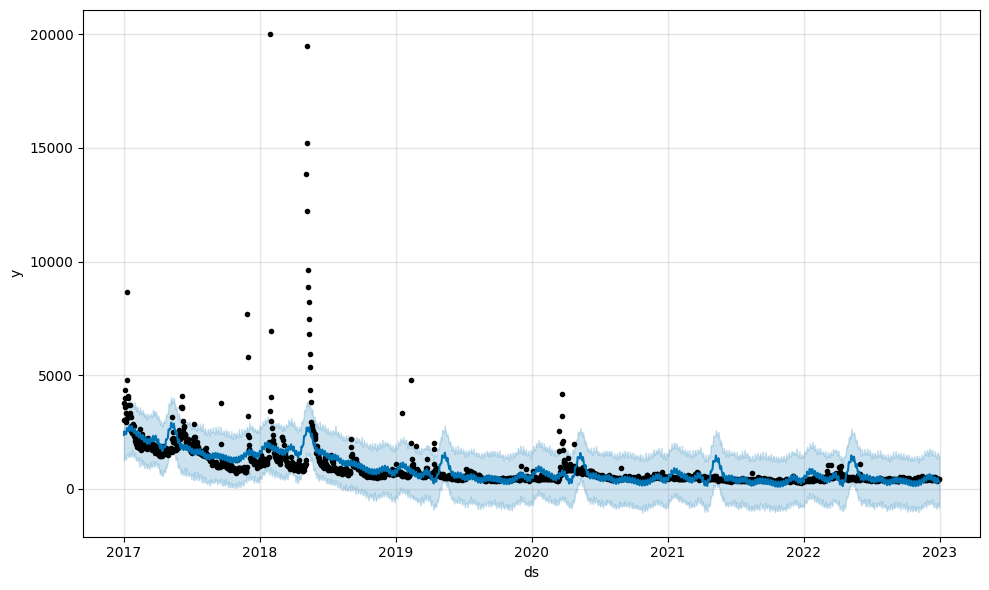

In [164]:
fig1 = m.plot(forecast)

<AxesSubplot: >

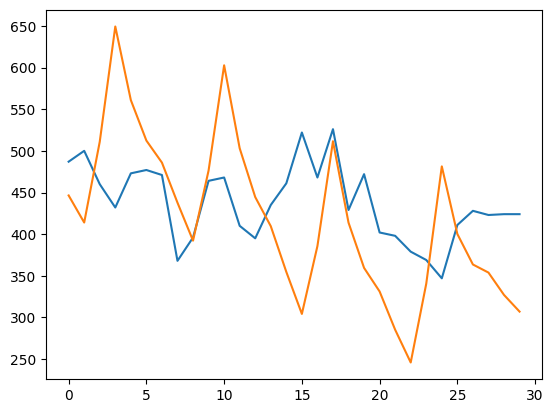

In [177]:
test.reset_index()['y'].plot()
forecast[-30:].reset_index()['yhat'].plot()